In [72]:
import os
os.getcwd()

'C:\\Users\\Shweta\\Downloads\\Project+-+Files'

In [73]:
import pyforest

In [74]:
df = pd.read_csv('wine.csv',header = None)

In [75]:
df = df[0].str.split(',', expand=True)

In [76]:
df.drop(0,axis = 1,inplace = True)

In [77]:
df.columns = ['alcohol','malic_acid','ash','ash_alcalinity','magnesium','total_phenols','flavanoids','nonflavanoid_phenols',
              'Proanthocyanins','color_intensity','hue','OD280_OD315','proline']

In [78]:
df.head()

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,Proanthocyanins,color_intensity,hue,OD280_OD315,proline
0,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
2,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
4,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735


In [79]:
df.isnull().sum()

alcohol                 0
malic_acid              0
ash                     0
ash_alcalinity          0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
Proanthocyanins         0
color_intensity         0
hue                     0
OD280_OD315             0
proline                 0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   alcohol               178 non-null    object
 1   malic_acid            178 non-null    object
 2   ash                   178 non-null    object
 3   ash_alcalinity        178 non-null    object
 4   magnesium             178 non-null    object
 5   total_phenols         178 non-null    object
 6   flavanoids            178 non-null    object
 7   nonflavanoid_phenols  178 non-null    object
 8   Proanthocyanins       178 non-null    object
 9   color_intensity       178 non-null    object
 10  hue                   178 non-null    object
 11  OD280_OD315           178 non-null    object
 12  proline               178 non-null    object
dtypes: object(13)
memory usage: 18.2+ KB


In [81]:
for i in df:
    df[i] = df[i].astype('float')

In [82]:
df.dtypes

alcohol                 float64
malic_acid              float64
ash                     float64
ash_alcalinity          float64
magnesium               float64
total_phenols           float64
flavanoids              float64
nonflavanoid_phenols    float64
Proanthocyanins         float64
color_intensity         float64
hue                     float64
OD280_OD315             float64
proline                 float64
dtype: object

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
ash_alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<IPython.core.display.Javascript object>

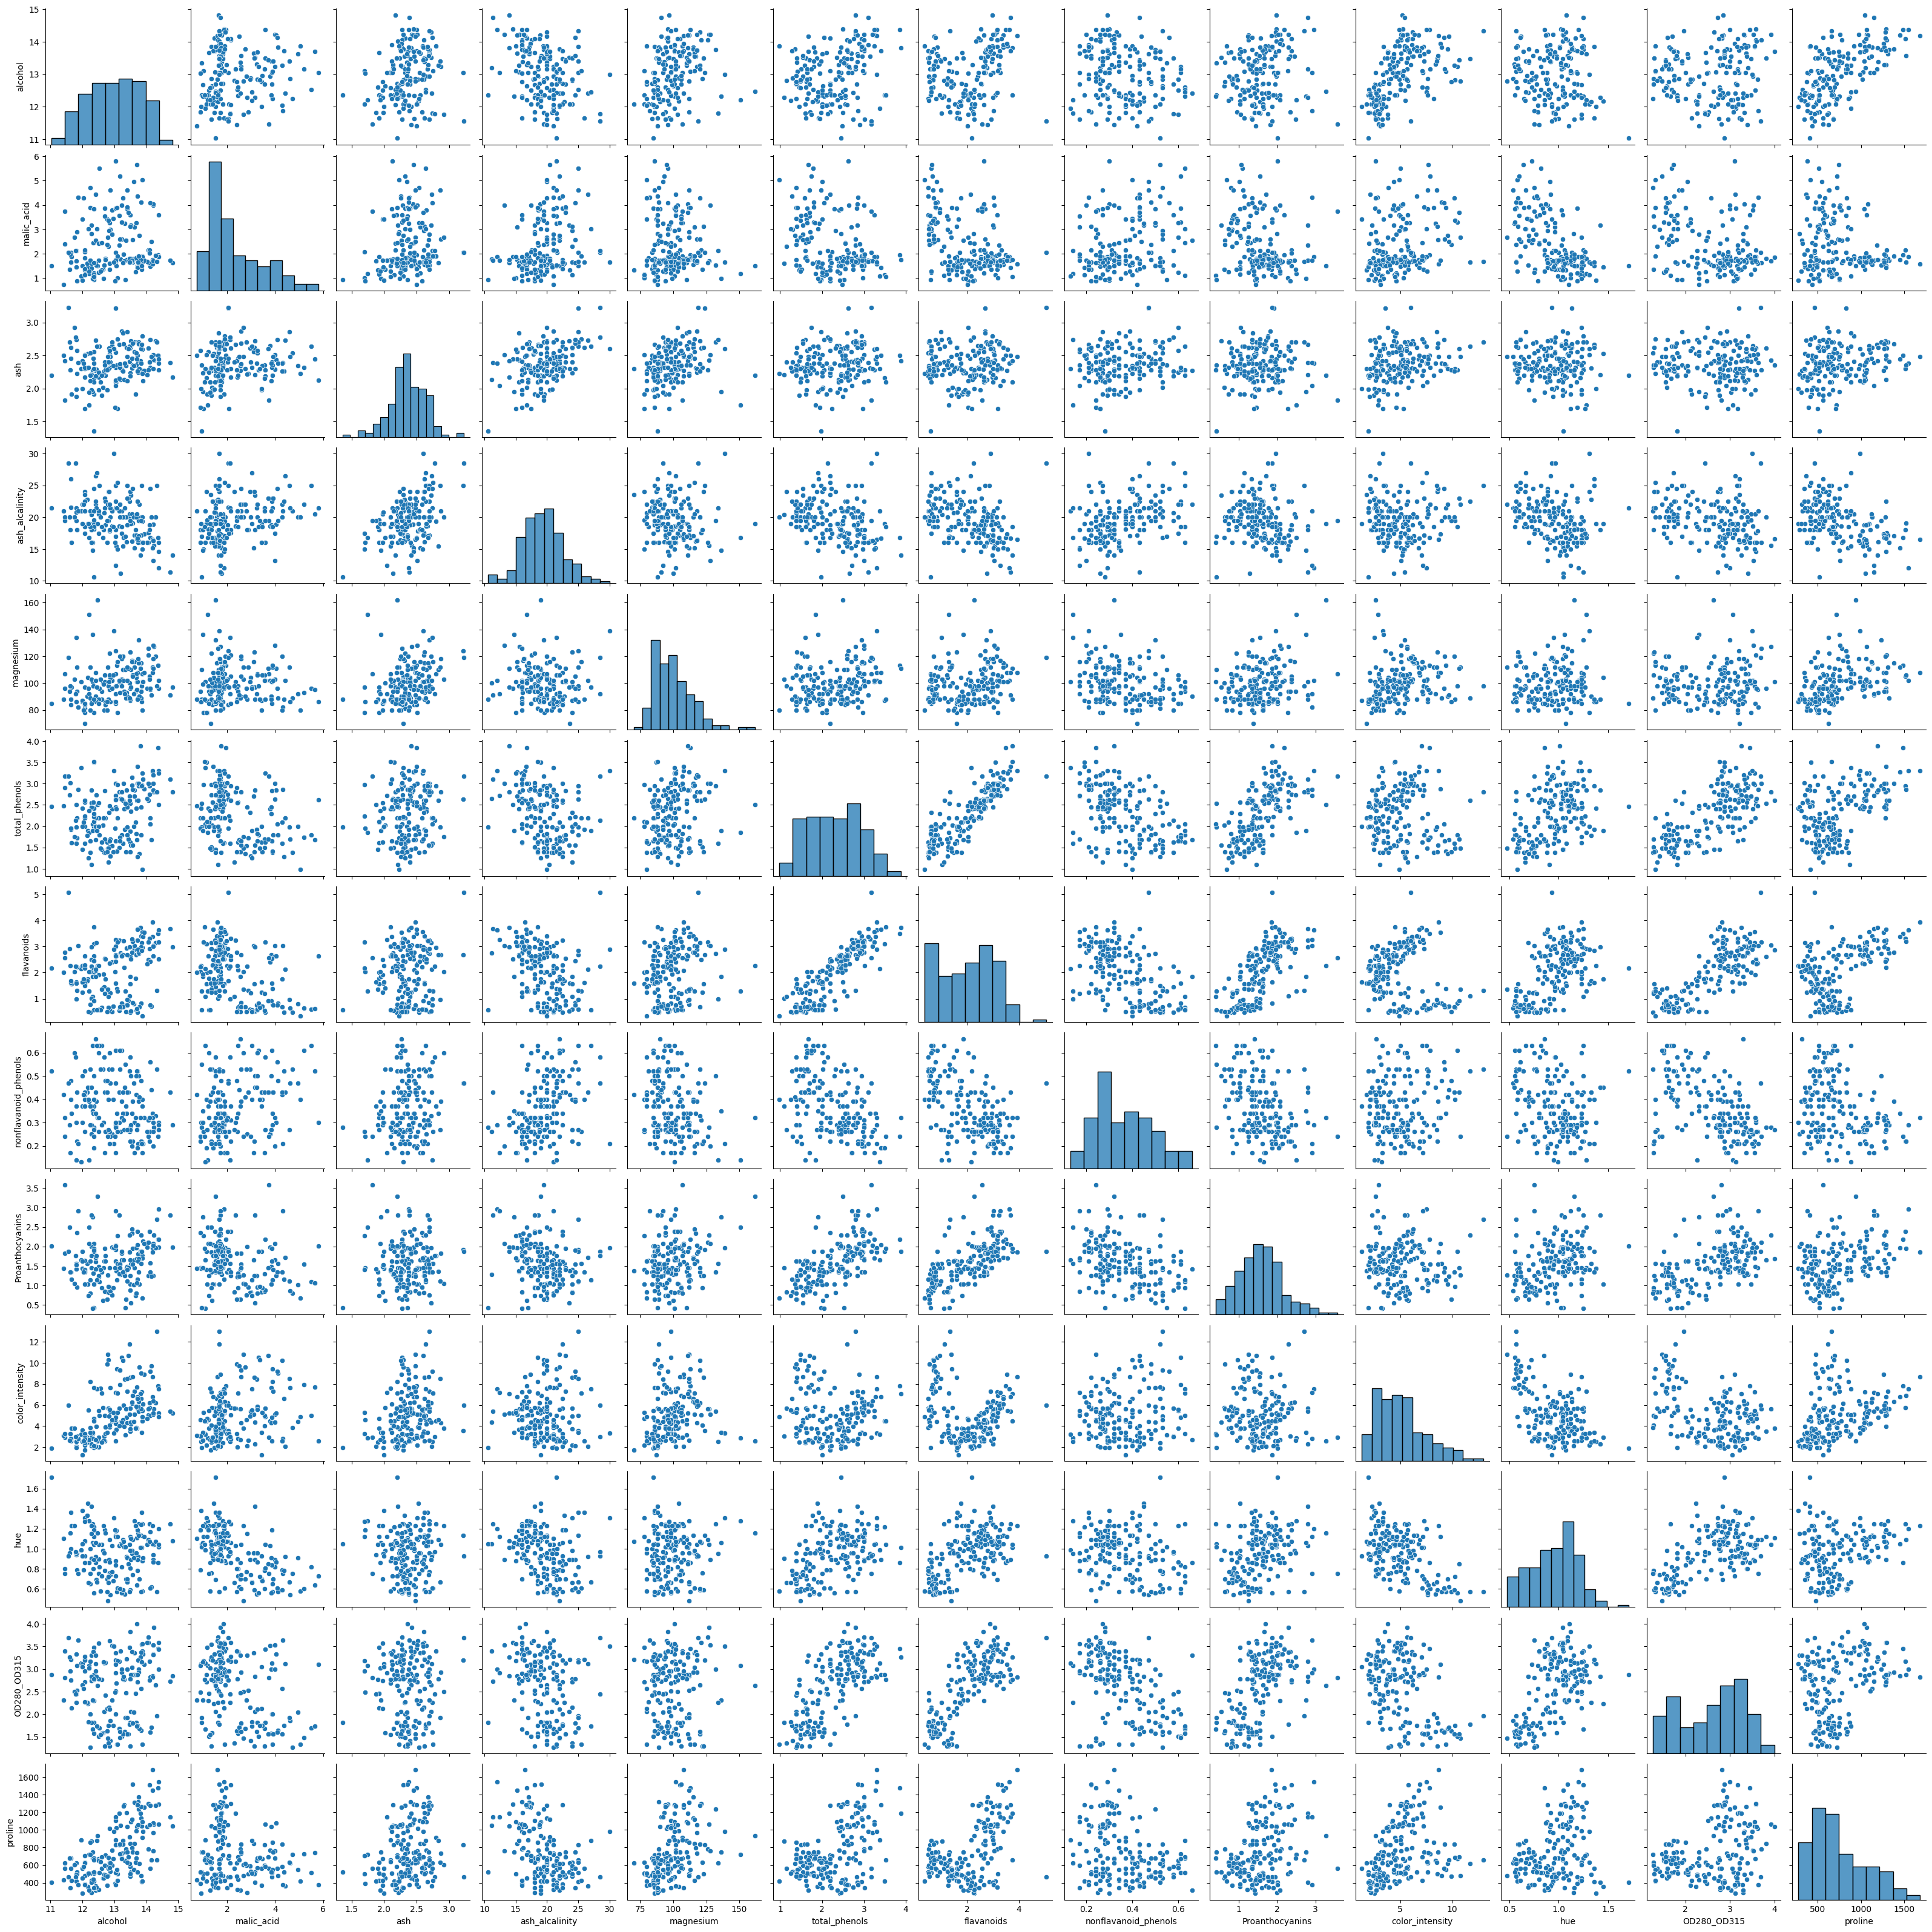

In [84]:
sns.pairplot(df)

In [85]:
corr_mtx = df.corr()
corr_mtx

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,Proanthocyanins,color_intensity,hue,OD280_OD315,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
ash_alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

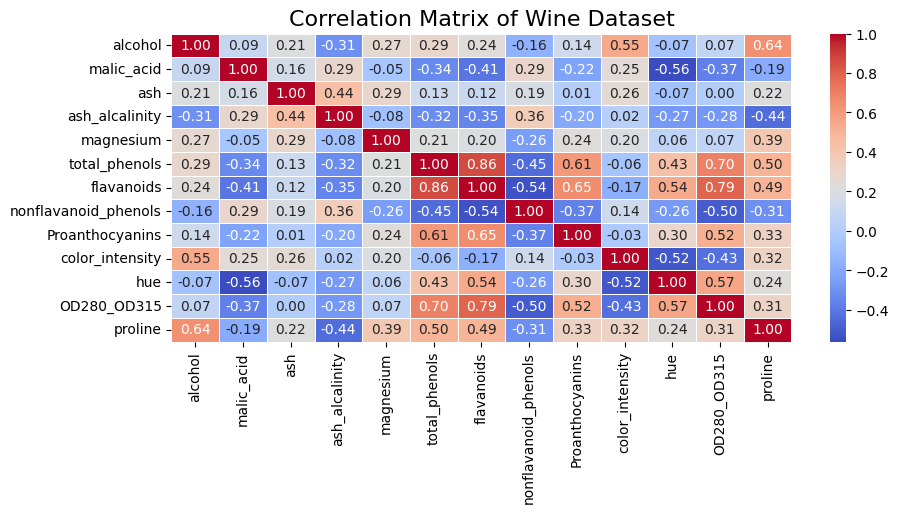

In [86]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Wine Dataset', fontsize=16)
plt.show()

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [88]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Perform PCA on all components
pca = PCA()
pca_result = pca.fit_transform(df_scaled)
# Calculate the explained variance for each component
explained_variance = pca.explained_variance_ratio_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

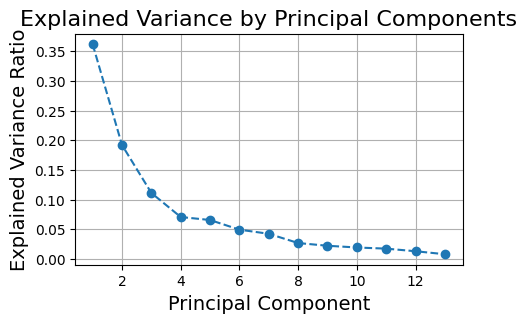

In [89]:
# Plot the explained variance
plt.figure(figsize=(5, 3))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

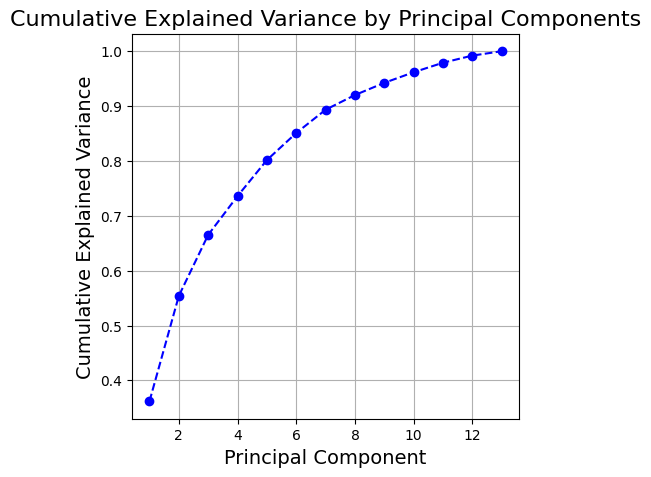

In [47]:
# Cumulative explained variance plot
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(5, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.grid(True)
plt.show()

In [122]:
cumulative_variance

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [90]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, len(explained_variance) + 1)])

In [93]:
pca_df.drop(['PC10','PC11','PC12','PC13'],axis=1,inplace = True)

In [95]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

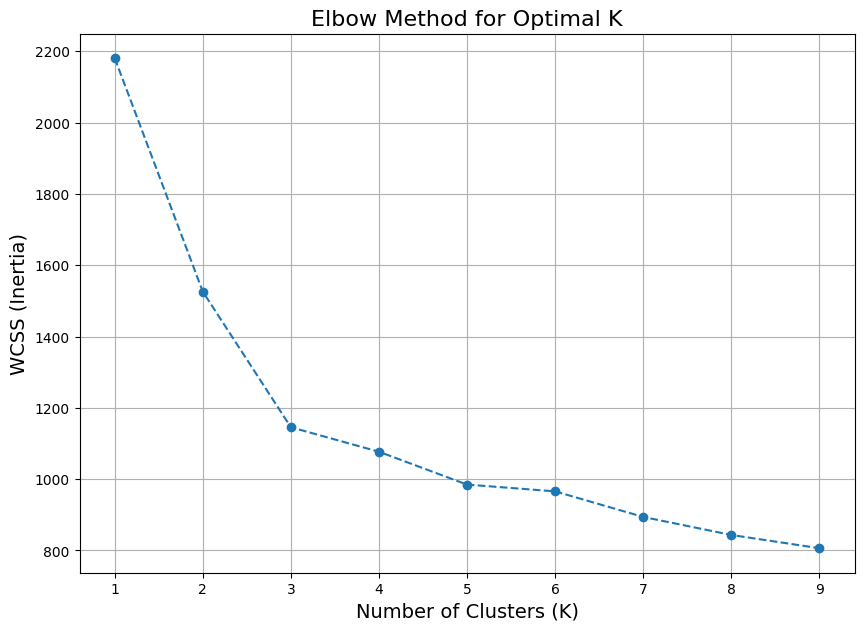

In [96]:
from sklearn.cluster import KMeans

data_for_clustering = pca_df 
# Define the range for the number of clusters
wcss = []
K = range(1, 10)  # Trying K values from 1 to 6

# Calculate WCSS for each number of clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)  # Inertia is WCSS (Within-cluster sum of squared errors)

# Plot the Elbow Method results
plt.figure(figsize=(10, 7))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('WCSS (Inertia)', fontsize=14)
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.grid(True)
plt.show()

In [97]:
from sklearn.metrics import silhouette_score

# Define the range for the number of clusters
silhouette_scores = []
K = range(2, 6)  # Range of clusters to evaluate 

# Calculate Silhouette Score for each number of clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_for_clustering)
    sil_score = silhouette_score(data_for_clustering, cluster_labels)
    silhouette_scores.append(sil_score)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

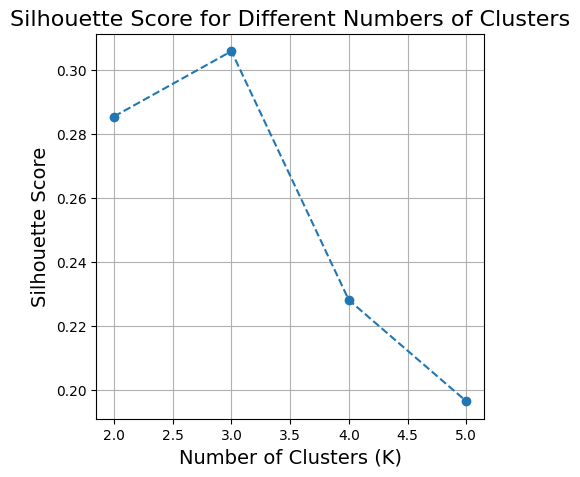

In [98]:
# Plot the Silhouette Scores for each number of clusters
plt.figure(figsize=(5, 5))
plt.plot(K, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Score for Different Numbers of Clusters', fontsize=16)
plt.grid(True)
plt.show()

#### From the elbow method and silhouette score method, we can conclude that the optimal number of clusters should be 3.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

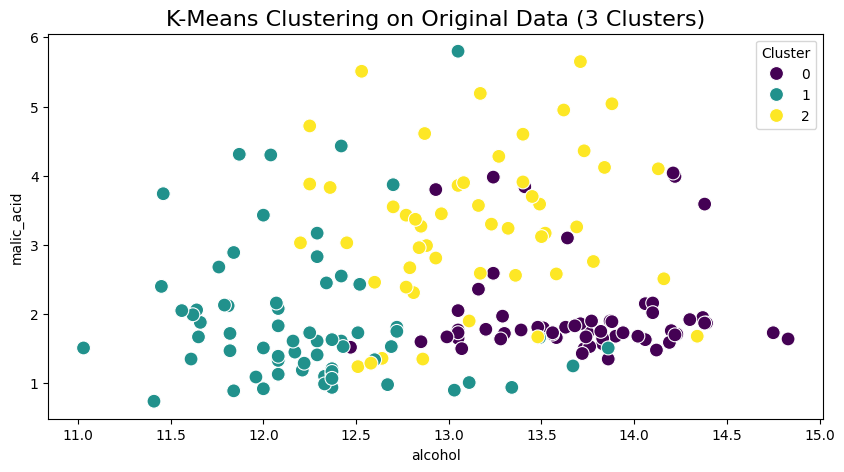

In [114]:
# Apply K-Means clustering with 3 clusters
random.seed(1)
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(pca_df)

# Add the cluster labels back to the original DataFrame
df['Cluster'] = cluster_labels

# Visualize the clusters (for example, with the first two original features)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.columns[0], y=df.columns[1], hue='Cluster', palette='viridis', data=df, s=100)
plt.title('K-Means Clustering on Original Data (3 Clusters)', fontsize=16)
plt.show()

In [115]:
# Analyze cluster characteristics by taking the mean of each feature for each cluster
cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,Proanthocyanins,color_intensity,hue,OD280_OD315,proline
Cluster,,,,,,,,,,,,,
0,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344
1,12.240455,1.899697,2.246364,20.190909,93.136364,2.261818,2.095909,0.359394,1.627879,3.018939,1.060697,2.816818,509.484848
2,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


In [116]:
df.head()

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,Proanthocyanins,color_intensity,hue,OD280_OD315,proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [117]:
df.Cluster.value_counts()

Cluster
1    66
0    61
2    51
Name: count, dtype: int64

## Supervised technique

In [118]:
df.head()

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,Proanthocyanins,color_intensity,hue,OD280_OD315,proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [121]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Separate the features (X) and the target (y)
X = df.drop(columns=['Cluster'])  # Features (all columns except 'Cluster')
y = df['Cluster']  # Target (cluster labels)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Step 4: Predict the cluster labels on the test set
y_pred = classifier.predict(X_test)

# Step 5: Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 90.74%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       0.95      0.90      0.92        20
           2       1.00      0.80      0.89        15

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.91        54
weighted avg       0.92      0.91      0.91        54


Confusion Matrix:
 [[19  0  0]
 [ 2 18  0]
 [ 2  1 12]]
